# Assessing the effect of Random Under Sampling on the accuracy of Random Forest Tree

In [1]:
from lxml import objectify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [22]:
path = r'CLEAN_House3.csv'
csvapp = pd.read_csv(path,index_col=0,parse_dates=[1])

# making the index a datetime object
import datetime as datetime
csvapp.set_index(pd.DatetimeIndex(csvapp.index),inplace=True)

clean_csv = csvapp.resample('5T').mean()

clean_csv.columns = ['aggragate','Toaster','fridge-freezer','freezer','dryer','dishwasher','washing_machine','TV','Microwave','Kettle','issues']
clean_csv = clean_csv[clean_csv.issues == 0]

# create time of day column
cols = ['time','month','hour','minute','day_of_the_week','week','aggragate','Toaster','fridge-freezer','freezer','dryer','dishwasher','washing_machine','TV','Microwave','Kettle','issues']

usage2 = pd.DataFrame(index = clean_csv.index, columns=cols)

usage2.hour = clean_csv.index.hour
usage2.minute = clean_csv.index.minute

usage2.month=clean_csv.index.month

usage2.day_of_the_week = clean_csv.index.dayofweek
usage2.time = clean_csv.index.hour*60+clean_csv.index.minute

usage2.week = clean_csv.index.week

usage2.fillna(0, inplace = True)

usage2.TV[(clean_csv.TV > 20)] = 1

usage2.Kettle[(clean_csv.Kettle > 20)] =1

usage2.Microwave[(clean_csv.Microwave>15)] =1

usage2.Toaster[(clean_csv.Toaster > 15)] = 1



In [23]:
t_data_size = range(1,200)
t = pd.DataFrame(index = t_data_size, columns=['accuracy','recall'])
for i in range(1,200):
    ones = len(usage2.TV[(usage2.TV == 1)])
    zero_indices = usage2[usage2.TV == 0].index
    random_indices = np.random.choice(zero_indices,ones, replace=False)
    ones = usage2[usage2.TV == 1].index
    under_sample_indices = np.concatenate([ones,random_indices])
    under_sample = usage2.loc[under_sample_indices]

    cols = ['month','hour','minute','day_of_the_week','week']

    X = under_sample[cols]
    y = under_sample.TV

    under_sample = usage2.loc[under_sample_indices]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


    #### RTF

    clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
    clf_rf.fit(X_train, y_train)

    y_pred_class = clf_rf.predict(X_test)
    t.accuracy[i]=accuracy_score(y_test, y_pred_class)
    t.recall[i]=recall_score(y_test, y_pred_class)
# print('Undersampled RTF')
# print(accuracy_score(y_test, y_pred_class))
# print(recall_score(y_test, y_pred_class),'\n')

In [24]:
t.sort_values(by=['accuracy'],inplace=True)

In [25]:
t.max()-t.min()

accuracy    0.013989
recall      0.015039
dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


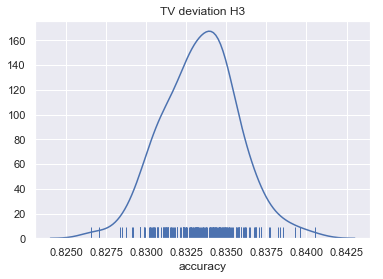

In [26]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(t.accuracy, kde= True,bins=20,hist=False, rug=True)
plt.title('TV deviation H3')
plt.savefig('dist_TV_3.png')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


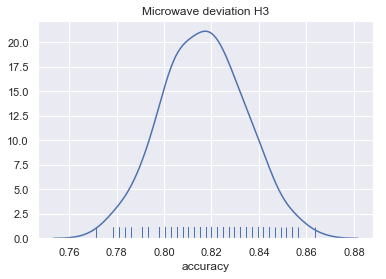

In [27]:
t_data_size = range(1,200)
t = pd.DataFrame(index = t_data_size, columns=['accuracy','recall'])
for i in range(1,200):
    ones = len(usage2.Microwave[(usage2.Microwave == 1)])
    zero_indices = usage2[(usage2.Microwave == 0)].index
    random_indices = np.random.choice(zero_indices,ones, replace=False)
    ones = usage2[usage2.Microwave == 1].index
    under_sample_indices = np.concatenate([ones,random_indices])
    under_sample = usage2.loc[under_sample_indices]

    cols = ['month','hour','minute','day_of_the_week','week']

    X = under_sample[cols]
    y = under_sample.Microwave

    under_sample = usage2.loc[under_sample_indices]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


    #### RTF

    clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
    clf_rf.fit(X_train, y_train)

    y_pred_class = clf_rf.predict(X_test)
    t.accuracy[i]=accuracy_score(y_test, y_pred_class)
    t.recall[i]=recall_score(y_test, y_pred_class)
t.max()-t.min()
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(t.accuracy, kde= True,bins=20,hist=False, rug=True);
plt.title('Microwave deviation H3')
plt.savefig('dist_Microwave_3.png')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


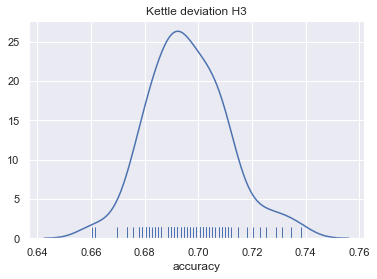

In [28]:
t_data_size = range(1,100)
t = pd.DataFrame(index = t_data_size, columns=['accuracy','recall'])
for i in range(1,100):
    ones = len(usage2.Kettle[(usage2.Kettle == 1)])
    zero_indices = usage2[usage2.Kettle == 0].index
    random_indices = np.random.choice(zero_indices,ones, replace=False)
    ones = usage2[usage2.Kettle == 1].index
    under_sample_indices = np.concatenate([ones,random_indices])
    under_sample = usage2.loc[under_sample_indices]

    cols = ['month','hour','minute','day_of_the_week','week']

    X = under_sample[cols]
    y = under_sample.Kettle

    under_sample = usage2.loc[under_sample_indices]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


    #### RTF

    clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
    clf_rf.fit(X_train, y_train)

    y_pred_class = clf_rf.predict(X_test)
    t.accuracy[i]=accuracy_score(y_test, y_pred_class)
    t.recall[i]=recall_score(y_test, y_pred_class)
t.max()-t.min()

import seaborn as sns
sns.set(color_codes=True)
sns.distplot(t.accuracy, kde= True,bins=20,hist=False, rug=True);
plt.title('Kettle deviation H3')
plt.savefig('dist_Kettle_3.png')